# Ordinary Least Squares Classifier – Binary Classifier

<b> Import the required dependencies </b>

In [1]:
# import packages
import struct
import numpy as np
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.linear_model import LinearRegression

<b> Load the MNIST data into memory </b>

In [2]:
# downloading data
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
with open('train-images-idx3-ubyte.gz', 'wb') as f:
    f.write(request.read())
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
with open('t10k-images-idx3-ubyte.gz', 'wb') as f:
    f.write(request.read())

In [3]:
# Downloading the corresponding labels for the data
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
with open('train-labels-idx1-ubyte.gz', 'wb') as f:
    f.write(request.read())
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')
with open('t10k-labels-idx1-ubyte.gz', 'wb') as f:
    f.write(request.read())

In [4]:
# unzip the files in the local directory
!dir *.gz #for windows # !ls *.gz for linux and Mac

 O volume na unidade F ‚ Hevans
 O N£mero de S‚rie do Volume ‚ F8C8-B844

 Pasta de F:\Data_Science\Packt\SupervisedLearning

29/01/2021  23:30         1.648.877 t10k-images-idx3-ubyte.gz
29/01/2021  23:30             4.542 t10k-labels-idx1-ubyte.gz
29/01/2021  23:30         9.912.422 train-images-idx3-ubyte.gz
29/01/2021  23:30            28.881 train-labels-idx1-ubyte.gz

 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning

29/01/2021  23:30         1.648.877 t10k-images-idx3-ubyte.gz
29/01/2021  23:30             4.542 t10k-labels-idx1-ubyte.gz
29/01/2021  23:30         9.912.422 train-images-idx3-ubyte.gz
29/01/2021  23:30            28.881 train-labels-idx1-ubyte.gz

 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 P

In [5]:
# Load the downloaded data
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img = np.array(array("B", f.read())).reshape((size, rows, cols))
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

<b> Visualize a sample of the data </b>

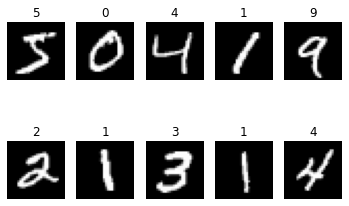

In [6]:
# plot of the first 10 images in the training sample
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i], cmap='gray')
    plt.title(f'{labels[i]}')
    plt.axis('off')

<b> Select only the digits 0 and 1 </b>

In [7]:
# selecting zeros and ones from the sample dataset
samples_0_1 = np.where((labels == 0) | (labels == 1))[0]
images_0_1 = img[samples_0_1]
labels_0_1 = labels[samples_0_1]
samples_0_1_test = np.where((labels_test == 0) | (labels_test == 1))
images_0_1_test = img_test[samples_0_1_test].reshape((-1, rows * cols))
labels_0_1_test = labels_test[samples_0_1_test]

<b> Visualize the selected information with images of one sample of 0 and one sample of 1 </b>

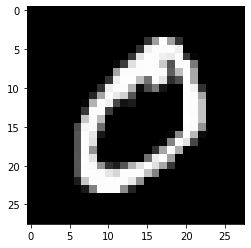

In [8]:
sample_0 = np.where((labels == 0))[0][0]
plt.imshow(img[sample_0], cmap='gray')
plt.show()

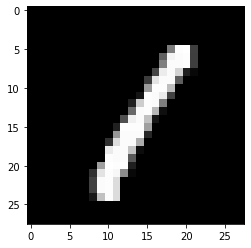

In [9]:
sample_1 = np.where((labels == 1))[0][0]
plt.imshow(img[sample_1], cmap='gray')
plt.show()

<b> In order to provide the image information to the model, we must first flatten the data out so that each image is 1 x 784 pixels in shape </b>

In [10]:
# reshaping data from matrix to vector form
images_0_1 = images_0_1.reshape((-1, rows * cols))
images_0_1.shape

(12665, 784)

<b> Construct the model </b>

In [11]:
# create the model
model = LinearRegression() # especifying solver to avoid warning message
model.fit(X=images_0_1, y=labels_0_1)

LinearRegression()

<b> Determine the accuracy against the training set </b>

In [12]:
# Check the performance of this model
model.score(X=images_0_1, y=labels_0_1)

0.9705731670264528

<b> Determine the label predictions for each of the training samples, using a threshold of 0.5 </b>

In [13]:
y_pred = model.predict(images_0_1)

for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
        
print(y_pred)

[0. 1. 1. ... 1. 0. 1.]


<b> Compute the classification accuracy of the predicted training values versus the ground truth. </b>

In [14]:
np.sum(y_pred == labels_0_1) / len(labels_0_1)

0.9947887879984209

<b> Compare the performance against the test set </b>

In [15]:
y_pred = model.predict(images_0_1_test)

for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
        
print(y_pred)

[1. 0. 1. ... 1. 0. 1.]


In [16]:
np.sum(y_pred == labels_0_1_test) / len(labels_0_1_test)

0.9929078014184397

# KNN Multiclass Classifier

<b> Import packages </b>

In [17]:
import struct
import numpy as np
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.neighbors import KNeighborsClassifier as KNN

<b> Load the MNIST data into memory </b>

In [18]:
# downloading data
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
with open('train-images-idx3-ubyte.gz', 'wb') as f:
    f.write(request.read())
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
with open('t10k-images-idx3-ubyte.gz', 'wb') as f:
    f.write(request.read())

In [19]:
# Downloading the corresponding labels for the data
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
with open('train-labels-idx1-ubyte.gz', 'wb') as f:
    f.write(request.read())
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')
with open('t10k-labels-idx1-ubyte.gz', 'wb') as f:
    f.write(request.read())

In [20]:
# unzip the files in the local directory
!dir *.gz #for windows # !ls *.gz for linux and Mac

 O volume na unidade F ‚ Hevans
 O N£mero de S‚rie do Volume ‚ F8C8-B844

 Pasta de F:\Data_Science\Packt\SupervisedLearning

29/01/2021  23:30         1.648.877 t10k-images-idx3-ubyte.gz
29/01/2021  23:30             4.542 t10k-labels-idx1-ubyte.gz
29/01/2021  23:30         9.912.422 train-images-idx3-ubyte.gz
29/01/2021  23:30            28.881 train-labels-idx1-ubyte.gz

 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning

29/01/2021  23:30         1.648.877 t10k-images-idx3-ubyte.gz
29/01/2021  23:30             4.542 t10k-labels-idx1-ubyte.gz
29/01/2021  23:30         9.912.422 train-images-idx3-ubyte.gz
29/01/2021  23:30            28.881 train-labels-idx1-ubyte.gz

 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 P

In [21]:
# Load the downloaded data
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img = np.array(array("B", f.read())).reshape((size, rows, cols))
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

<b> Visualize a sample of the data </b>

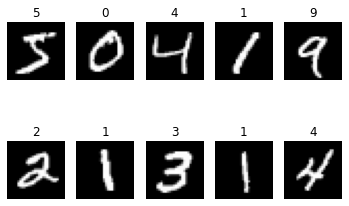

In [22]:
# plot of the first 10 images in the training sample
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i], cmap='gray')
    plt.title(f'{labels[i]}')
    plt.axis('off')

<b> Randomly sample 5,000 images for use in training </b>

In [23]:
np.random.seed(0)
selection = np.random.choice(len(img), 5000)
selected_images = img[selection]
selected_labels = labels[selection]

<b> In order to provide the image information to the model, we must first flatten the data out such that each image is 1 x 784 pixels in shape </b>

In [24]:
# reshape the input data in vector form
selected_images = selected_images.reshape((-1, rows * cols))
selected_images.shape

(5000, 784)

In [25]:
# preprocessing the data
# selected_images = selected_images / 255
# img_test = img_test / 255

<b> Build the KNN model with k=3 and fit the data to the model </b>

In [26]:
model = KNN(n_neighbors=3)
model.fit(X=selected_images, y=selected_labels)

KNeighborsClassifier(n_neighbors=3)

<b> Determine the score against the training set. </b>

In [27]:
model.score(X=selected_images, y=selected_labels)

0.9712

<b> Display the first two predictions for the model against the training data. </b>

In [28]:
model.predict(selected_images)[:2]

array([4, 1], dtype=uint8)

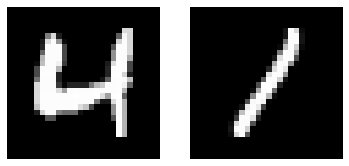

In [29]:
plt.subplot(1, 2, 1)
plt.imshow(selected_images[0].reshape((28, 28)), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(selected_images[1].reshape((28, 28)), cmap='gray')
plt.axis('off')
plt.show()

<b> Compare the performance against the test set. </b>

In [30]:
model.score(X=img_test.reshape((-1, rows * cols)), y=labels_test)

0.9346

# Binary Classification Using CART Decision Tree

In [31]:
# import packages
import struct
import numpy as np
import pandas as pd
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<b> Load the MNIST data into memory </b>

In [32]:
# downloading data
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
with open('train-images-idx3-ubyte.gz', 'wb') as f:
    f.write(request.read())
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
with open('t10k-images-idx3-ubyte.gz', 'wb') as f:
    f.write(request.read())

In [33]:
# Downloading the corresponding labels for the data
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
with open('train-labels-idx1-ubyte.gz', 'wb') as f:
    f.write(request.read())
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')
with open('t10k-labels-idx1-ubyte.gz', 'wb') as f:
    f.write(request.read())

In [34]:
# unzip the files in the local directory
!dir *.gz #for windows # !ls *.gz for linux and Mac

 O volume na unidade F ‚ Hevans
 O N£mero de S‚rie do Volume ‚ F8C8-B844

 Pasta de F:\Data_Science\Packt\SupervisedLearning

29/01/2021  23:31         1.648.877 t10k-images-idx3-ubyte.gz
29/01/2021  23:31             4.542 t10k-labels-idx1-ubyte.gz
29/01/2021  23:31         9.912.422 train-images-idx3-ubyte.gz
29/01/2021  23:31            28.881 train-labels-idx1-ubyte.gz

 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning

29/01/2021  23:31         1.648.877 t10k-images-idx3-ubyte.gz
29/01/2021  23:31             4.542 t10k-labels-idx1-ubyte.gz
29/01/2021  23:31         9.912.422 train-images-idx3-ubyte.gz
29/01/2021  23:31            28.881 train-labels-idx1-ubyte.gz

 Pasta de F:\Data_Science\Packt\SupervisedLearning


 Pasta de F:\Data_Science\Packt\SupervisedLearning


 P

In [35]:
# Load the downloaded data
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img = np.array(array("B", f.read())).reshape((size, rows, cols))
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

<b> Visualize a sample of the data </b>

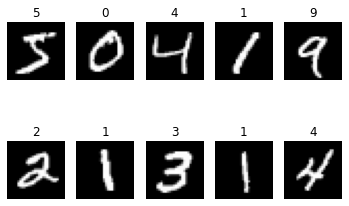

In [36]:
# plot of the first 10 images in the training sample
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i], cmap='gray')
    plt.title(f'{labels[i]}')
    plt.axis('off')

<b> Select only samples with digit 0 or digit 1 </b>

In [37]:
samples_0_1 = np.where((labels == 0) | (labels == 1))[0]
images_0_1 = img[samples_0_1]
labels_0_1 = labels[samples_0_1]
samples_0_1_test = np.where((labels_test == 0) | (labels_test == 1))
images_0_1_test = img_test[samples_0_1_test].reshape((-1, rows * cols))
labels_0_1_test = labels_test[samples_0_1_test]

<b> Visualize the selected information with images of one sample of 0 and one sample of 1 </b>

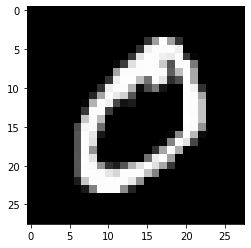

In [38]:
sample_0 = np.where((labels == 0))[0][0]
plt.imshow(img[sample_0], cmap='gray')
plt.show()

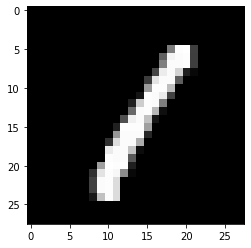

In [39]:
sample_1 = np.where((labels == 1))[0][0]
plt.imshow(img[sample_1], cmap='gray')
plt.show()

<b> In order to provide the image information to the model, we must first flatten the data out so that each image is 1 x 784 pixels in shape </b>

In [40]:
images_0_1 = images_0_1.reshape((-1, rows * cols))
images_0_1.shape

(12665, 784)

<b> Construct the model </b>

In [41]:
model = DecisionTreeClassifier(random_state=123)
model = model.fit(images_0_1, labels_0_1)

<b> Determine the training set accuracy </b>

In [42]:
model.score(X=images_0_1, y=labels_0_1)

1.0

<b> Compare the performance against the test set </b>

In [43]:
y_pred = model.predict(images_0_1) > 0.5
y_pred = y_pred.astype(int)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [44]:
np.sum(y_pred == labels_0_1) / len(labels_0_1)

1.0

# Breast Cancer Diagnosis Classification Using Artificial Neural Networks

<b> Import packages </b>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<b> Load the Breast Cancer Diagnosis dataset using pandas and examine the first five rows </b>

In [46]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [47]:
X, y = df[[c for c in df.columns if c != 'diagnosis']], df.diagnosis

<b> Normalize the dataset </b>

In [48]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.values)
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


<b> Convert the diagnosis values into labels that can be used within the model </b>

In [49]:
diagnoses = [
    'benign', # 0
    'malignant', # 1
]
output = [diagnoses.index(diag) for diag in y]

<b> Split the training dataset into a training and a validation set </b>

In [50]:
train_X, valid_X, train_y, valid_y = train_test_split(X, output, test_size=0.2, random_state=123)

<b> Create the model using the normalized dataset and the assigned diagnosis labels </b>

In [51]:
model = MLPClassifier(solver='sgd', hidden_layer_sizes=(100,), max_iter=1000, random_state=1, learning_rate_init=0.01)
model.fit(X=train_X, y=train_y)

MLPClassifier(learning_rate_init=0.01, max_iter=1000, random_state=1,
              solver='sgd')

<b> Compute the accuracy of the model against the validation set </b>

In [52]:
model.score(valid_X, valid_y)

0.9824561403508771